# Challenge for “Merit Prize” 2024/2025

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

data = datasets.load_breast_cancer()

feat_train, feat_test, target_train, target_test = train_test_split(
    data.data,
    data.target,
    train_size=0.7,
    random_state=42
)

## Exercise 1

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(feat_train, target_train)
accuracy = accuracy_score(target_test, log_reg.predict(feat_test))
print(f"Accuracy of logistic regression: {round(accuracy, 3)}")

Accuracy of logistic regression: 0.977


## Exercise 2

Best k predicted to be 2 (silhouette of 0.667)


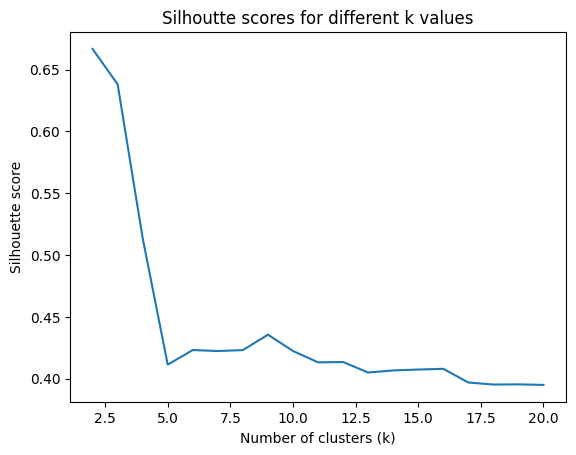

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

ks = [i for i in range(2, 21)]
silhouettes = []
optimal_em = None
max_silhouette = -1
best_k = None
models = []

for k in ks:
    em = GaussianMixture(n_components=k, random_state=42)
    em.fit(feat_train)
    silhouette = silhouette_score(feat_train, em.predict(feat_train))
    silhouettes.append(silhouette)
    models.append(em)
    if silhouette > max_silhouette:
        max_silhouette = silhouette
        optimal_em = em
        best_k = k

print(f"Best k predicted to be {best_k} (silhouette of {round(max_silhouette, 3)})")

sns.lineplot(x=ks, y=silhouettes)
plt.title("Silhoutte scores for different k values")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.show()

## Exercises 3 & 4

Accuracy of logistic regression (k = 2): 0.924
Accuracy of logistic regression (k = 3): 0.936
Accuracy of logistic regression (k = 4): 0.895
Accuracy of logistic regression (k = 5): 0.895
Accuracy of logistic regression (k = 6): 0.883
Accuracy of logistic regression (k = 7): 0.883
Accuracy of logistic regression (k = 8): 0.895
Accuracy of logistic regression (k = 9): 0.912
Accuracy of logistic regression (k = 10): 0.906
Accuracy of logistic regression (k = 11): 0.906
Accuracy of logistic regression (k = 12): 0.901
Accuracy of logistic regression (k = 13): 0.901
Accuracy of logistic regression (k = 14): 0.901
Accuracy of logistic regression (k = 15): 0.901
Accuracy of logistic regression (k = 16): 0.901
Accuracy of logistic regression (k = 17): 0.895
Accuracy of logistic regression (k = 18): 0.895
Accuracy of logistic regression (k = 19): 0.895
Accuracy of logistic regression (k = 20): 0.895
PCC(silhouette, accuracy): 0.753


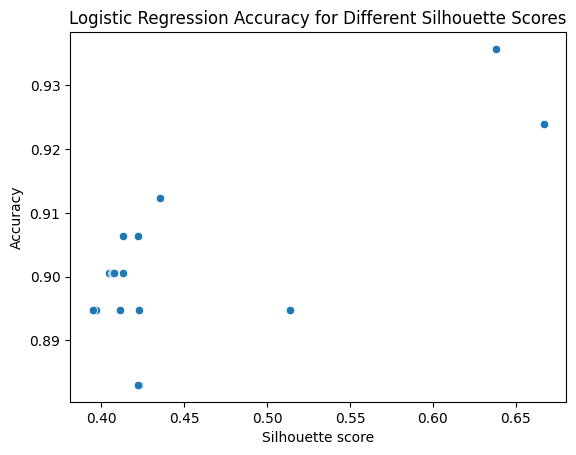

In [4]:
import numpy as np

accuracies = []
for model in models:
    prob_map = model.predict_proba(feat_test)
    log_reg_mapped = LogisticRegression(max_iter=10000, random_state=42)
    log_reg_mapped.fit(prob_map, target_test)
    accuracy = accuracy_score(target_test, log_reg_mapped.predict(prob_map))
    accuracies.append(accuracy)
    print(f"Accuracy of logistic regression (k = {len(model.weights_)}): {round(accuracy, 3)}")

print(f"PCC(silhouette, accuracy): {round(np.corrcoef(silhouettes, accuracies)[0, 1], 3)}")
sns.scatterplot(x=silhouettes, y=accuracies)
plt.title("Logistic Regression Accuracy for Different Silhouette Scores")
plt.xlabel("Silhouette score")
plt.ylabel("Accuracy")
plt.show()

## Exercise 5

In [5]:
def rbf(x, mean, covariance):
    return np.exp(-0.5 * (x - mean).T @ np.linalg.inv(covariance) @ (x - mean))

def map_point(x, means, covariances):
    assert(x is not None and means is not None and covariances is not None)
    assert(len(means) != 0)
    assert(len(means) == len(covariances))
    res = []
    for i in range(len(means)):
        assert(len(x) == len(means[i]))
        assert(len(x) == len(covariances[i]))
        res.append(rbf(x, means[i], covariances[i]))
    return res

def map_set(X, means, covariances):
    design = []
    assert(X is not None)
    assert(len(X) != 0)
    for x in X:
        design.append(map_point(x, means, covariances))
    return np.array(design)

RBFOutput = LogisticRegression(max_iter=10000, random_state=42)
rbf_feat_train = map_set(feat_train, optimal_em.means_, optimal_em.covariances_)
rbf_feat_test = map_set(feat_test, optimal_em.means_, optimal_em.covariances_)
RBFOutput.fit(rbf_feat_train, target_train)
pred = RBFOutput.predict(rbf_feat_test)
accuracy = accuracy_score(target_test, pred)
print(f"Accuracy of RBF Network (before normalizing): {round(accuracy, 3)}")

for row in rbf_feat_train:
    row[0] = row[0] / (row[0] + row[1])
    row[1] = row[1] / (row[0] + row[1])

for row in rbf_feat_test:
    row[0] = row[0] / (row[0] + row[1])
    row[1] = row[1] / (row[0] + row[1])

RBFOutput.fit(rbf_feat_train, target_train)
pred = RBFOutput.predict(rbf_feat_test)
accuracy = accuracy_score(target_test, pred)
print(f"Accuracy of RBF Network (after normalizing): {round(accuracy, 3)}")

Accuracy of RBF Network (before normalizing): 0.632
Accuracy of RBF Network (after normalizing): 0.918
